<a href="https://colab.research.google.com/github/spatank/Curiosity/blob/master/v8/mech_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Curiosity_v8/')

Mounted at /content/drive


In [2]:
!ls # run !ls to verify location

build_Wiki_networks.ipynb	persistent_homology_simulations.ipynb
C_plotting.ipynb		persistent_homology_Wiki.ipynb
Figures				PH_plotting.ipynb
KNOT				Simulations
mech_plotting.ipynb		Wiki
persistent_homology_KNOT.ipynb


In [3]:
import glob
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import sys
!{sys.executable} -m pip install traces

import traces

def time_normalize_and_merge(timeseries_lst, make_1_1 = False):
    """
    Takes in a list of time series (of possibly different lengths) and
    subsamples them using traces so they all range from 0 and 1 and are defined
    on the same points.
    """
    n_series = len(timeseries_lst)
    timeseries_lst = [traces.TimeSeries(zip(*(np.linspace(0, 1, len(ts)), ts)))
                      for ts in timeseries_lst]
    timeseries_lst = traces.TimeSeries.merge(timeseries_lst)
    if make_1_1:
        timeseries_lst[1.0] = [1.0] * n_series
    X = list(zip(*timeseries_lst.items()))[0]  # x values
    Y = list(zip(*timeseries_lst.items()))[1]  # y values across all series
    return X, Y

def plot_curve(curves_lst, curve_label = 'none', curve_color = 'none', null = 'none'):
  """
  Accepts a list of curves and the identity of the null model used if the data 
  come from one; curve_label and curve_color arguments are used for plotting.
  Plots average curve with a standard deviation/error band. 
  """
  
  max_nodes = max([len(lst) for lst in curves_lst])
  curves_mat = np.empty([len(curves_lst), max_nodes])
  curves_mat[:] = np.nan
  for i, j in enumerate(curves_lst):
    curves_mat[i][0:len(j)] = j
  numels = np.count_nonzero(~np.isnan(curves_mat), axis = 0)
  mean = np.nanmean(curves_mat, axis = 0)[numels != 1]
  std = np.nanstd(curves_mat, axis = 0)[numels != 1]
  # mins = mean - std
  mins = mean - np.divide(std, np.sqrt(numels[numels != 1]))
  mins = np.maximum(0, mins)
  # maxes = mean + std
  maxes = mean + np.divide(std, np.sqrt(numels[numels != 1]))
  X = np.arange(len(numels[numels != 1]))

  plt.plot(X, mean, color = curve_color, label = curve_label,
            linewidth = 1)
  plt.fill_between(X, mins, maxes, facecolor = curve_color, alpha = 0.2)



def plot_curve_normalized_idx(curves_lst, curve_label = 'none', curve_color = 'none', null = 'none'):
  """
  Accepts a list of curves and the identity of the null model used if the data 
  come from one; curve_label and curve_color arguments are used for plotting.
  Plots average curve with a standard deviation/error band, and with the x-axis 
  normalized to be [0, 1].
  """
  
  X, Y = time_normalize_and_merge(curves_lst)
  mean = np.nanmean(Y, axis = 1)
  # mins = np.nanmean(Y, axis = 1) - np.nanstd(Y, axis = 1)
  mins = np.nanmean(Y, axis = 1) - np.nanstd(Y, axis = 1)/np.sqrt(len(curves_lst))
  mins = np.maximum(0, mins)
  # maxes = np.nanmean(Y, axis = 1) + np.nanstd(Y, axis = 1)
  maxes = np.nanmean(Y, axis = 1) + np.nanstd(Y, axis = 1)/np.sqrt(len(curves_lst))

  plt.plot(X, mean, color = curve_color, label = curve_label,
            linewidth = 1)
  plt.fill_between(X, mins, maxes, facecolor = curve_color, alpha = 0.2)

  Created wheel for infinity: filename=infinity-1.5-py3-none-any.whl size=3095 sha256=2821c3be9b9eef36d7bf0f559874785c9b88e459a1e1c6dde87307659a1f3d20
  Stored in directory: /root/.cache/pip/wheels/ee/2c/f4/26985d995b1d5930ab73914f76ffccd54b1af31c2e68b507bc
Successfully built infinity


# KNOT

In [5]:
base_path = '/content/drive/My Drive/Curiosity_v8/KNOT/Processed/Mech/'

In [6]:
files = glob.glob(base_path + '*.mat')

## All Participants

In [7]:
files = glob.glob(base_path + '*.mat')

all_num_nodes = []
all_d = []
all_d_edge_rewired = []
all_d_latticized = []
all_rigid = []
all_rigid_edge_rewired = []
all_rigid_latticized = []
all_conform = []
all_conform_edge_rewired = []
all_conform_latticized = []
all_DoF = []
all_DoF_edge_rewired = []
all_DoF_latticized = []

for idx, mech_file in enumerate(files):
  data_dict = sio.loadmat(mech_file)
  num_nodes = data_dict['n']
  all_num_nodes.append(num_nodes)

  all_d.append(np.squeeze(data_dict['d']))
  d_edge_rewired = data_dict['d_edge_rewired']
  all_d_edge_rewired.append(list(np.nanmean(d_edge_rewired, axis = 0)))
  d_latticized = data_dict['d_latticized']
  all_d_latticized.append(list(np.nanmean(d_latticized, axis = 0)))

  all_rigid.append(np.squeeze(data_dict['rigid']))
  rigid_edge_rewired = data_dict['rigid_edge_rewired']
  all_rigid_edge_rewired.append(list(np.nanmean(rigid_edge_rewired, axis = 0)))
  rigid_latticized = data_dict['rigid_latticized']
  all_rigid_latticized.append(list(np.nanmean(rigid_latticized, axis = 0)))

  all_conform.append(np.squeeze(data_dict['conform']))
  conform_edge_rewired = data_dict['conform_edge_rewired']
  all_conform_edge_rewired.append(list(np.nanmean(conform_edge_rewired, axis = 0)))
  conform_latticized = data_dict['conform_latticized']
  all_conform_latticized.append(list(np.nanmean(conform_latticized, axis = 0)))

  all_DoF.append(np.squeeze(data_dict['DoF']))
  DoF_edge_rewired = data_dict['DoF_edge_rewired']
  all_DoF_edge_rewired.append(list(np.nanmean(DoF_edge_rewired, axis = 0)))
  DoF_latticized = data_dict['DoF_latticized']
  all_DoF_latticized.append(list(np.nanmean(DoF_latticized, axis = 0)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


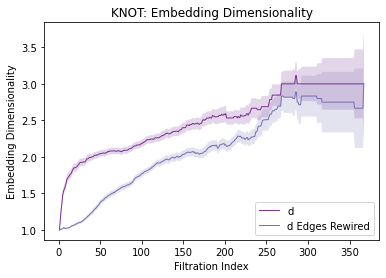

In [8]:
plot_curve(all_d, curve_label = 'd', curve_color = '#7b3294')
plot_curve(all_d_edge_rewired, curve_label = 'd Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_d_latticized, curve_label = 'd Latticized', curve_color = '#d95f02')
plt.title('KNOT: Embedding Dimensionality')
plt.xlabel('Filtration Index')
plt.ylabel('Embedding Dimensionality')
plt.legend(loc = 'lower right')
plt.savefig('Figures/Mech/all_KNOT_d.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


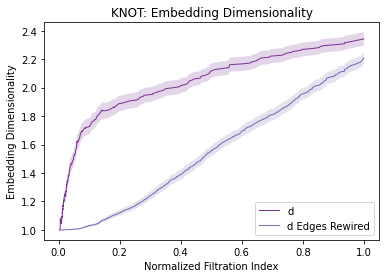

In [9]:
plot_curve_normalized_idx(all_d, curve_label = 'd', curve_color = '#7b3294')
plot_curve_normalized_idx(all_d_edge_rewired, curve_label = 'd Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_d_latticized, curve_label = 'd Latticized', curve_color = '#d95f02')
plt.title('KNOT: Embedding Dimensionality')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Embedding Dimensionality')
plt.legend(loc = 'lower right')
plt.savefig('Figures/Mech/all_KNOT_d_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


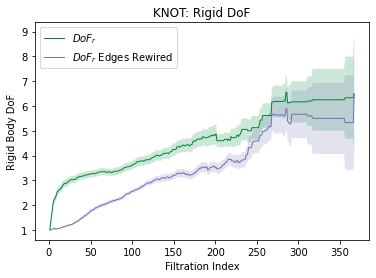

In [10]:
plot_curve(all_rigid, curve_label = '$DoF_r$', curve_color = '#008837')
plot_curve(all_rigid_edge_rewired, curve_label = '$DoF_r$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_rigid_latticized, curve_label = '$DoF_r$ Latticized', curve_color = '#d95f02')
plt.title('KNOT: Rigid DoF')
plt.xlabel('Filtration Index')
plt.ylabel('Rigid Body DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_KNOT_rigid.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


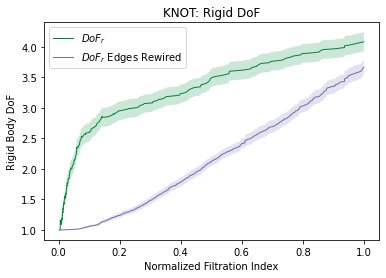

In [11]:
plot_curve_normalized_idx(all_rigid, curve_label = '$DoF_r$', curve_color = '#008837')
plot_curve_normalized_idx(all_rigid_edge_rewired, curve_label = '$DoF_r$ Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_rigid_latticized, curve_label = '$DoF_r$ Latticized', curve_color = '#d95f02')
plt.title('KNOT: Rigid DoF')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Rigid Body DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_KNOT_rigid_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


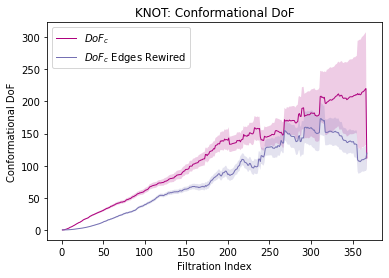

In [12]:
plot_curve(all_conform, curve_label = '$DoF_c$', curve_color = '#ae017e')
plot_curve(all_conform_edge_rewired, curve_label = '$DoF_c$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_conform_latticized, curve_label = '$DoF_c$ Latticized', curve_color = '#d95f02')
plt.title('KNOT: Conformational DoF')
plt.xlabel('Filtration Index')
plt.ylabel('Conformational DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_KNOT_conform.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


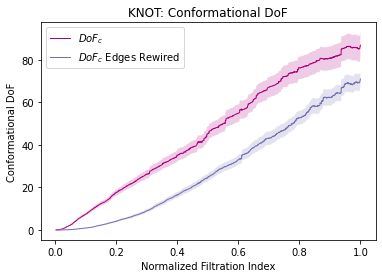

In [13]:
plot_curve_normalized_idx(all_conform, curve_label = '$DoF_c$', curve_color = '#ae017e')
plot_curve_normalized_idx(all_conform_edge_rewired, curve_label = '$DoF_c$ Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_conform_latticized, curve_label = '$DoF_c$ Latticized', curve_color = '#d95f02')
plt.title('KNOT: Conformational DoF')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Conformational DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_KNOT_conform_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


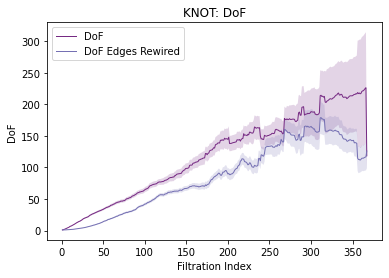

In [14]:
plot_curve(all_DoF, curve_label = 'DoF', curve_color = '#762a83')
plot_curve(all_DoF_edge_rewired, curve_label = 'DoF Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_DoF_latticized, curve_label = 'DoF Latticized', curve_color = '#d95f02')
plt.title('KNOT: DoF')
plt.xlabel('Filtration Index')
plt.ylabel('DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_KNOT_DoF.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


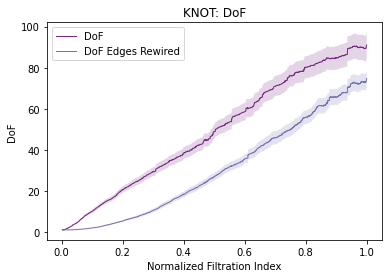

In [15]:
plot_curve_normalized_idx(all_DoF, curve_label = 'DoF', curve_color = '#762a83')
plot_curve_normalized_idx(all_DoF_edge_rewired, curve_label = 'DoF Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_DoF_latticized, curve_label = 'DoF Latticized', curve_color = '#d95f02')
plt.title('KNOT: DoF')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_KNOT_DoF_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

## One Participant

In [16]:
subj_ID = 106
data_dict = sio.loadmat(base_path + 'subj_' + str(subj_ID) + '_mech.mat')

num_nodes = data_dict['n']

d = np.squeeze(data_dict['d'])
d_edge_rewired = data_dict['d_edge_rewired']
d_latticized = data_dict['d_latticized']

rigid = np.squeeze(data_dict['rigid'])
rigid_edge_rewired = data_dict['rigid_edge_rewired']
rigid_latticized = data_dict['rigid_latticized']

conform = np.squeeze(data_dict['conform'])
conform_edge_rewired = data_dict['conform_edge_rewired']
conform_latticized = data_dict['conform_latticized']

DoF = np.squeeze(data_dict['DoF'])
DoF_edge_rewired = data_dict['DoF_edge_rewired']
DoF_latticized = data_dict['DoF_latticized']

X = np.arange(num_nodes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


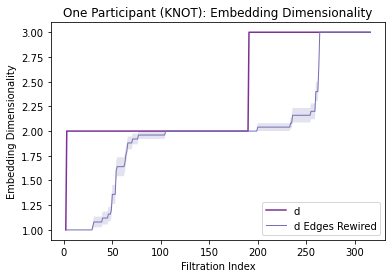

In [17]:
plt.plot(X, d, color = '#7b3294', label = 'd')
plot_curve(d_edge_rewired, curve_label = 'd Edges Rewired', curve_color = '#7570b3')
# plot_curve(d_latticized, curve_label = 'd Latticized', curve_color = '#d95f02')
plt.title('One Participant (KNOT): Embedding Dimensionality')
plt.xlabel('Filtration Index')
plt.ylabel('Embedding Dimensionality')
plt.legend(loc = 'lower right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


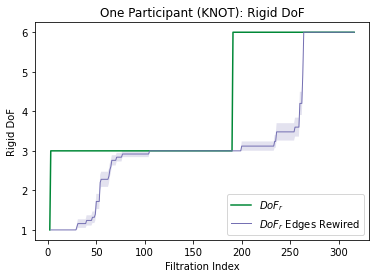

In [18]:
plt.plot(X, rigid, color = '#008837', label = '$DoF_r$')
plot_curve(rigid_edge_rewired, curve_label = '$DoF_r$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(rigid_latticized, curve_label = 'DoF_r Latticized', curve_color = '#d95f02')
plt.title('One Participant (KNOT): Rigid DoF')
plt.xlabel('Filtration Index')
plt.ylabel('Rigid DoF')
plt.legend(loc = 'lower right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


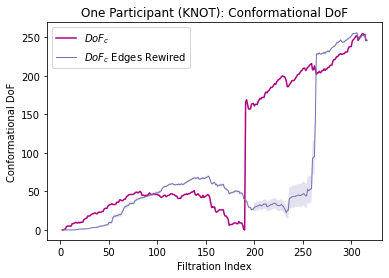

In [19]:
plt.plot(X, conform, color = '#ae017e', label = '$DoF_c$')
plot_curve(conform_edge_rewired, curve_label = '$DoF_c$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(conform_latticized, curve_label = '$DoF_c$ Latticized', curve_color = '#d95f02')
plt.title('One Participant (KNOT): Conformational DoF')
plt.xlabel('Filtration Index')
plt.ylabel('Conformational DoF')
plt.legend(loc = 'upper left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


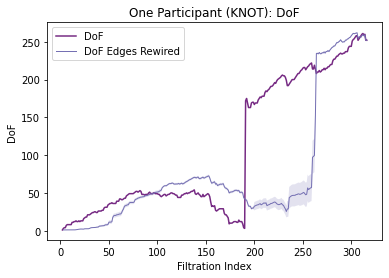

In [20]:
plt.plot(X, DoF, color = '#762a83', label = 'DoF')
plot_curve(DoF_edge_rewired, curve_label = 'DoF Edges Rewired', curve_color = '#7570b3')
# plot_curve(DoF_latticized, curve_label = 'DoF Latticized', curve_color = '#d95f02')
plt.title('One Participant (KNOT): DoF')
plt.xlabel('Filtration Index')
plt.ylabel('DoF')
plt.legend(loc = 'upper left')

# Wikipedia Networks

In [21]:
base_path = '/content/drive/My Drive/Curiosity_v8/Wiki/Processed/Mech/'

In [22]:
files = glob.glob(base_path + '*.mat')

## All Topics

In [23]:
all_num_nodes = []
all_d = []
all_d_edge_rewired = []
all_d_latticized = []
all_rigid = []
all_rigid_edge_rewired = []
all_rigid_latticized = []
all_conform = []
all_conform_edge_rewired = []
all_conform_latticized = []
all_DoF = []
all_DoF_edge_rewired = []
all_DoF_latticized = []

for idx, mech_file in enumerate(files):
  data_dict = sio.loadmat(mech_file)
  num_nodes = data_dict['n']
  all_num_nodes.append(num_nodes)

  all_d.append(np.squeeze(data_dict['d']))
  d_edge_rewired = data_dict['d_edge_rewired']
  all_d_edge_rewired.append(list(np.nanmean(d_edge_rewired, axis = 0)))
  d_latticized = data_dict['d_latticized']
  all_d_latticized.append(list(np.nanmean(d_latticized, axis = 0)))

  all_rigid.append(np.squeeze(data_dict['rigid']))
  rigid_edge_rewired = data_dict['rigid_edge_rewired']
  all_rigid_edge_rewired.append(list(np.nanmean(rigid_edge_rewired, axis = 0)))
  rigid_latticized = data_dict['rigid_latticized']
  all_rigid_latticized.append(list(np.nanmean(rigid_latticized, axis = 0)))

  all_conform.append(np.squeeze(data_dict['conform']))
  conform_edge_rewired = data_dict['conform_edge_rewired']
  all_conform_edge_rewired.append(list(np.nanmean(conform_edge_rewired, axis = 0)))
  conform_latticized = data_dict['conform_latticized']
  all_conform_latticized.append(list(np.nanmean(conform_latticized, axis = 0)))

  all_DoF.append(np.squeeze(data_dict['DoF']))
  DoF_edge_rewired = data_dict['DoF_edge_rewired']
  all_DoF_edge_rewired.append(list(np.nanmean(DoF_edge_rewired, axis = 0)))
  DoF_latticized = data_dict['DoF_latticized']
  all_DoF_latticized.append(list(np.nanmean(DoF_latticized, axis = 0)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


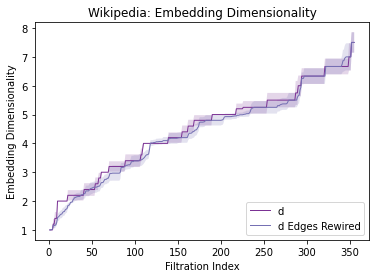

In [24]:
plot_curve(all_d, curve_label = 'd', curve_color = '#7b3294')
plot_curve(all_d_edge_rewired, curve_label = 'd Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_d_latticized, curve_label = 'd Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Embedding Dimensionality')
plt.xlabel('Filtration Index')
plt.ylabel('Embedding Dimensionality')
plt.legend(loc = 'lower right')
plt.savefig('Figures/Mech/all_Wiki_d.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


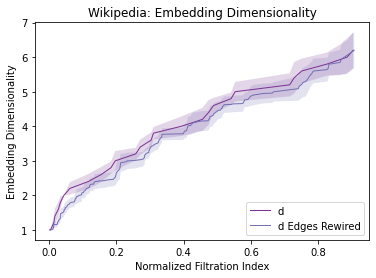

In [25]:
plot_curve_normalized_idx(all_d, curve_label = 'd', curve_color = '#7b3294')
plot_curve_normalized_idx(all_d_edge_rewired, curve_label = 'd Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_d_latticized, curve_label = 'd Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Embedding Dimensionality')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Embedding Dimensionality')
plt.legend(loc = 'lower right')
plt.savefig('Figures/Mech/all_Wiki_d_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


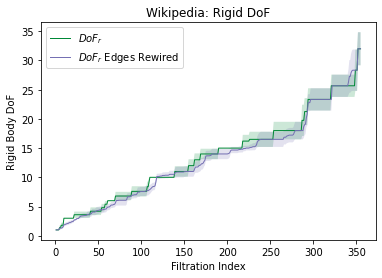

In [26]:
plot_curve(all_rigid, curve_label = '$DoF_r$', curve_color = '#008837')
plot_curve(all_rigid_edge_rewired, curve_label = '$DoF_r$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_rigid_latticized, curve_label = 'DoF_r Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Rigid DoF')
plt.xlabel('Filtration Index')
plt.ylabel('Rigid Body DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_Wiki_rigid.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


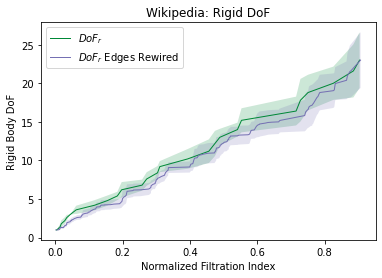

In [27]:
plot_curve_normalized_idx(all_rigid, curve_label = '$DoF_r$', curve_color = '#008837')
plot_curve_normalized_idx(all_rigid_edge_rewired, curve_label = '$DoF_r$ Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_rigid_latticized, curve_label = '$DoF_r$ Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Rigid DoF')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Rigid Body DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_Wiki_rigid_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


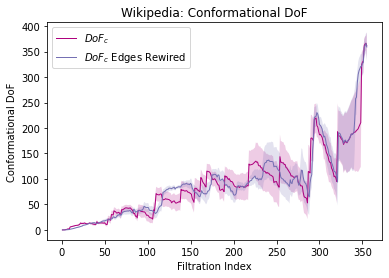

In [28]:
plot_curve(all_conform, curve_label = '$DoF_c$', curve_color = '#ae017e')
plot_curve(all_conform_edge_rewired, curve_label = '$DoF_c$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_conform_latticized, curve_label = '$DoF_c$ Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Conformational DoF')
plt.xlabel('Filtration Index')
plt.ylabel('Conformational DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_Wiki_conform.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


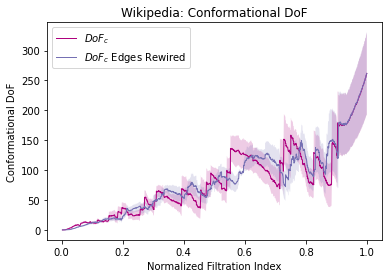

In [29]:
plot_curve_normalized_idx(all_conform, curve_label = '$DoF_c$', curve_color = '#ae017e')
plot_curve_normalized_idx(all_conform_edge_rewired, curve_label = '$DoF_c$ Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_conform_latticized, curve_label = '$DoF_c$ Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Conformational DoF')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Conformational DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_Wiki_conform_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


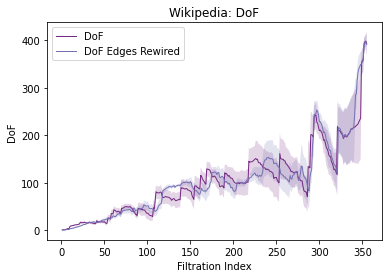

In [30]:
plot_curve(all_DoF, curve_label = 'DoF', curve_color = '#762a83')
plot_curve(all_DoF_edge_rewired, curve_label = 'DoF Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_DoF_latticized, curve_label = 'DoF Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: DoF')
plt.xlabel('Filtration Index')
plt.ylabel('DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_Wiki_DoF.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


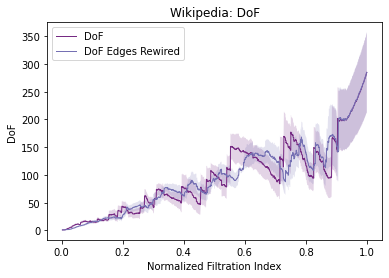

In [31]:
plot_curve_normalized_idx(all_DoF, curve_label = 'DoF', curve_color = '#762a83')
plot_curve_normalized_idx(all_DoF_edge_rewired, curve_label = 'DoF Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_DoF_latticized, curve_label = 'DoF Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: DoF')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('DoF')
plt.legend(loc = 'upper left')
plt.savefig('Figures/Mech/all_Wiki_DoF_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

## One Topic

In [32]:
topic_ID = 'software_engineering'

data_dict = sio.loadmat(base_path + topic_ID + '_mech.mat')

num_nodes = data_dict['n']

d = np.squeeze(data_dict['d'])
d_edge_rewired = data_dict['d_edge_rewired']
d_latticized = data_dict['d_latticized']

rigid = np.squeeze(data_dict['rigid'])
rigid_edge_rewired = data_dict['rigid_edge_rewired']
rigid_latticized = data_dict['rigid_latticized']

conform = np.squeeze(data_dict['conform'])
conform_edge_rewired = data_dict['conform_edge_rewired']
conform_latticized = data_dict['conform_latticized']

DoF = np.squeeze(data_dict['DoF'])
DoF_edge_rewired = data_dict['DoF_edge_rewired']
DoF_latticized = data_dict['DoF_latticized']

X = np.arange(num_nodes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


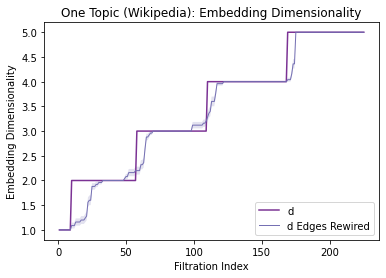

In [33]:
plt.plot(X, d, color = '#7b3294', label = 'd')
plot_curve(d_edge_rewired, curve_label = 'd Edges Rewired', curve_color = '#7570b3')
# plot_curve(d_latticized, curve_label = 'd Latticized', curve_color = '#d95f02')
plt.title('One Topic (Wikipedia): Embedding Dimensionality')
plt.xlabel('Filtration Index')
plt.ylabel('Embedding Dimensionality')
plt.legend(loc = 'lower right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


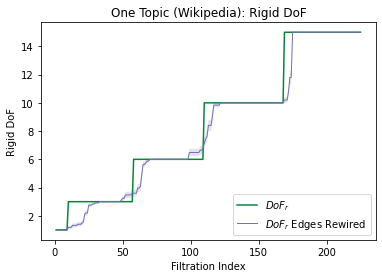

In [34]:
plt.plot(X, rigid, color = '#008837', label = '$DoF_r$')
plot_curve(rigid_edge_rewired, curve_label = '$DoF_r$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(rigid_latticized, curve_label = '$DoF_r$ Latticized', curve_color = '#d95f02')
plt.title('One Topic (Wikipedia): Rigid DoF')
plt.xlabel('Filtration Index')
plt.ylabel('Rigid DoF')
plt.legend(loc = 'lower right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


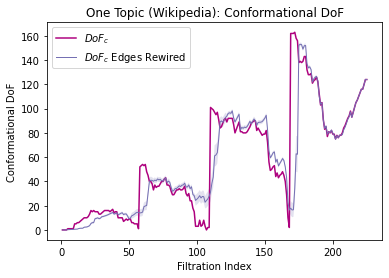

In [35]:
plt.plot(X, conform, color = '#ae017e', label = '$DoF_c$')
plot_curve(conform_edge_rewired, curve_label = '$DoF_c$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(conform_latticized, curve_label = '$DoF_c$ Latticized', curve_color = '#d95f02')
plt.title('One Topic (Wikipedia): Conformational DoF')
plt.xlabel('Filtration Index')
plt.ylabel('Conformational DoF')
plt.legend(loc = 'upper left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


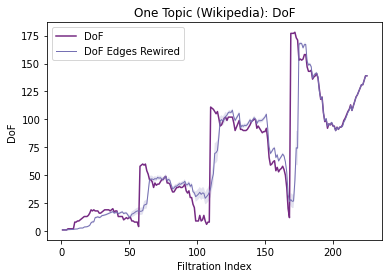

In [36]:
plt.plot(X, DoF, color = '#762a83', label = 'DoF')
plot_curve(DoF_edge_rewired, curve_label = 'DoF Edges Rewired', curve_color = '#7570b3')
# plot_curve(DoF_latticized, curve_label = 'DoF Latticized', curve_color = '#d95f02')
plt.title('One Topic (Wikipedia): DoF')
plt.xlabel('Filtration Index')
plt.ylabel('DoF')
plt.legend(loc = 'upper left')

# Simulated Networks

In [37]:
data_path = '/content/drive/My Drive/Curiosity_v8/Simulations/simulated_nets_mech.mat'
data_dict = sio.loadmat(data_path)

## Constant Probability Model

In [38]:
d_CP = data_dict['d_CP']
rigid_CP = data_dict['rigid_CP']
conform_CP = data_dict['conform_CP']
DoF_CP = data_dict['DoF_CP']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


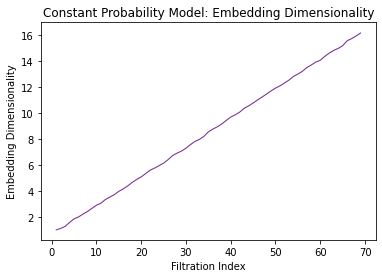

In [39]:
plot_curve(d_CP, curve_label = 'd', curve_color = '#7b3294')
plt.xlabel('Filtration Index')
plt.ylabel('Embedding Dimensionality')
plt.title('Constant Probability Model: Embedding Dimensionality')
plt.savefig('Figures/Mech/constant_probability_d.pdf', transparent = True, bbox_inches = 'tight')

In [40]:
# plot_curve_normalized_idx(d_CP, curve_label = 'd', curve_color = '#7b3294')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Embedding Dimensionality')
# plt.title('Constant Probability Model: Embedding Dimensionality')
# plt.savefig('Figures/Mech/constant_probability_d_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


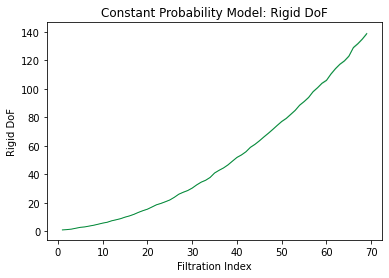

In [41]:
plot_curve(rigid_CP, curve_label = '$DoF_r$', curve_color = '#008837')
plt.xlabel('Filtration Index')
plt.ylabel('Rigid DoF')
plt.title('Constant Probability Model: Rigid DoF')
plt.savefig('Figures/Mech/constant_probability_rigid.pdf', transparent = True, bbox_inches = 'tight')

In [42]:
# plot_curve_normalized_idx(rigid_CP, curve_label = '$DoF_r$', curve_color = '#008837')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Rigid DoF')
# plt.title('Constant Probability Model: Rigid DoF')
# plt.savefig('Figures/Mech/constant_probability_rigid_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


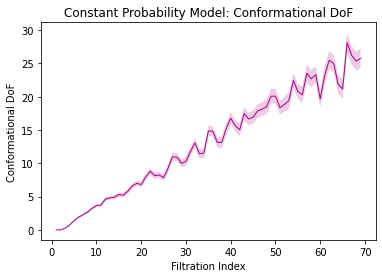

In [43]:
plot_curve(conform_CP, curve_label = '$DoF_c$', curve_color = '#ae017e')
plt.xlabel('Filtration Index')
plt.ylabel('Conformational DoF')
plt.title('Constant Probability Model: Conformational DoF')
plt.savefig('Figures/Mech/constant_probability_conform.pdf', transparent = True, bbox_inches = 'tight')

In [44]:
# plot_curve_normalized_idx(conform_CP, curve_label = '$DoF_c$', curve_color = '#ae017e')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Conformational DoF')
# plt.title('Constant Probability Model: Conformational DoF')
# plt.savefig('Figures/Mech/constant_probability_conform_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


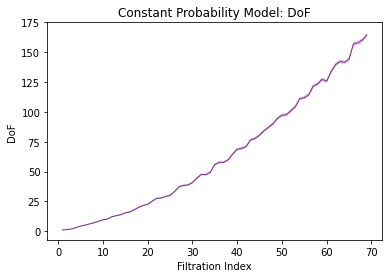

In [45]:
plot_curve(DoF_CP, curve_label = 'DoF', curve_color = '#762a83')
plt.xlabel('Filtration Index')
plt.ylabel('DoF')
plt.title('Constant Probability Model: DoF')
plt.savefig('Figures/Mech/constant_probability_DoF.pdf', transparent = True, bbox_inches = 'tight')

In [46]:
# plot_curve_normalized_idx(DoF_CP, curve_label = 'DoF', curve_color = '#762a83')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('DoF')
# plt.title('Constant Probability Model: DoF')
# plt.savefig('Figures/Mech/constant_probability_DoF_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

## Proportional Probability Model

In [47]:
d_PP = data_dict['d_PP']
rigid_PP = data_dict['rigid_PP']
conform_PP = data_dict['conform_PP']
DoF_PP = data_dict['DoF_PP']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


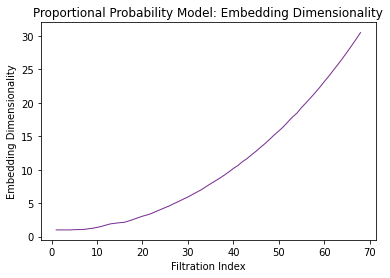

In [48]:
plot_curve(d_PP, curve_label = 'd', curve_color = '#7b3294')
plt.xlabel('Filtration Index')
plt.ylabel('Embedding Dimensionality')
plt.title('Proportional Probability Model: Embedding Dimensionality')
plt.savefig('Figures/Mech/proportional_probability_d.pdf', transparent = True, bbox_inches = 'tight')

In [49]:
# plot_curve_normalized_idx(d_PP, curve_label = 'd', curve_color = '#7b3294')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Embedding Dimensionality')
# plt.title('Proportional Probability Model: Embedding Dimensionality')
# plt.savefig('Figures/Mech/proportional_probability_d_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


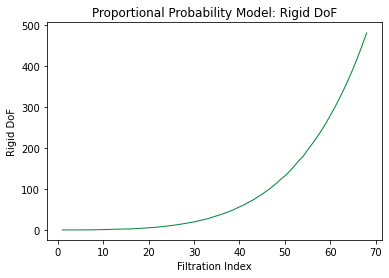

In [50]:
plot_curve(rigid_PP, curve_label = '$DoF_r$', curve_color = '#008837')
plt.xlabel('Filtration Index')
plt.ylabel('Rigid DoF')
plt.title('Proportional Probability Model: Rigid DoF')
plt.savefig('Figures/Mech/proportional_probability_rigid.pdf', transparent = True, bbox_inches = 'tight')

In [51]:
# plot_curve_normalized_idx(rigid_PP, curve_label = '$DoF_r$', curve_color = '#008837')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Rigid DoF')
# plt.title('Proportional Probability Model: Rigid DoF')
# plt.savefig('Figures/Mech/proportional_probability_rigid_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


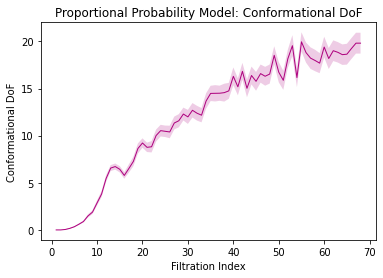

In [52]:
plot_curve(conform_PP, curve_label = '$DoF_c$', curve_color = '#ae017e')
plt.xlabel('Filtration Index')
plt.ylabel('Conformational DoF')
plt.title('Proportional Probability Model: Conformational DoF')
plt.savefig('Figures/Mech/proportional_probability_conform.pdf', transparent = True, bbox_inches = 'tight')

In [53]:
# plot_curve_normalized_idx(conform_PP, curve_label = '$DoF_c$', curve_color = '#ae017e')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Conformational DoF')
# plt.title('Proportional Probability Model: Conformational DoF')
# plt.savefig('Figures/Mech/proportional_probability_conform_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


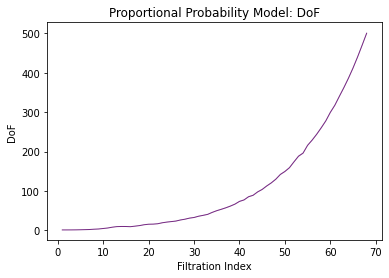

In [54]:
plot_curve(DoF_PP, curve_label = 'DoF', curve_color = '#762a83')
plt.xlabel('Filtration Index')
plt.ylabel('DoF')
plt.title('Proportional Probability Model: DoF')
plt.savefig('Figures/Mech/proportional_probability_DoF.pdf', transparent = True, bbox_inches = 'tight')

In [55]:
# plot_curve_normalized_idx(DoF_PP, curve_label = 'DoF', curve_color = '#762a83')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('DoF')
# plt.title('Proportional Probability Model: DoF')
# plt.savefig('Figures/Mech/proportional_probability_DoF_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

## Preferential Attachment Model

In [56]:
d_PA = data_dict['d_PA']
rigid_PA = data_dict['rigid_PA']
conform_PA = data_dict['conform_PA']
DoF_PA = data_dict['DoF_PA']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


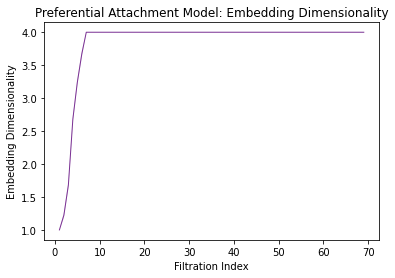

In [57]:
plot_curve(d_PA, curve_label = 'd', curve_color = '#7b3294')
plt.xlabel('Filtration Index')
plt.ylabel('Embedding Dimensionality')
plt.title('Preferential Attachment Model: Embedding Dimensionality')
plt.savefig('Figures/Mech/preferential_attachment_d.pdf', transparent = True, bbox_inches = 'tight')

In [58]:
# plot_curve_normalized_idx(d_PA, curve_label = 'd', curve_color = '#7b3294')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Embedding Dimensionality')
# plt.title('Preferential Attachment Model: Embedding Dimensionality')
# plt.savefig('Figures/Mech/preferential_attachment_d_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


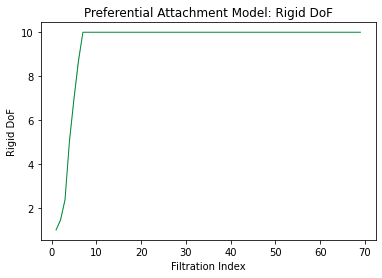

In [59]:
plot_curve(rigid_PA, curve_label = '$DoF_r$', curve_color = '#008837')
plt.xlabel('Filtration Index')
plt.ylabel('Rigid DoF')
plt.title('Preferential Attachment Model: Rigid DoF')
plt.savefig('Figures/Mech/preferential_attachment_rigid.pdf', transparent = True, bbox_inches = 'tight')

In [60]:
# plot_curve_normalized_idx(rigid_PA, curve_label = '$DoF_r$', curve_color = '#008837')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Rigid DoF')
# plt.title('Preferential Attachment Model: Rigid DoF')
# plt.savefig('Figures/Mech/preferential_attachment_rigid_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


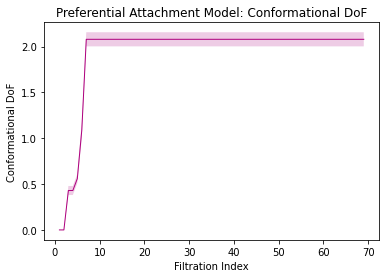

In [61]:
plot_curve(conform_PA, curve_label = '$DoF_c$', curve_color = '#ae017e')
plt.xlabel('Filtration Index')
plt.ylabel('Conformational DoF')
plt.title('Preferential Attachment Model: Conformational DoF')
plt.savefig('Figures/Mech/preferential_attachment_conform.pdf', transparent = True, bbox_inches = 'tight')

In [62]:
# plot_curve_normalized_idx(conform_PA, curve_label = '$DoF_c$', curve_color = '#ae017e')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Conformational DoF')
# plt.title('Preferential Attachment Model: Conformational DoF')
# plt.savefig('Figures/Mech/preferential_attachment_conform_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


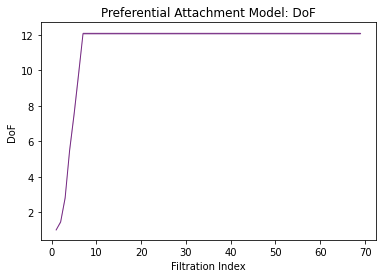

In [63]:
plot_curve(DoF_PA, curve_label = 'DoF', curve_color = '#762a83')
plt.xlabel('Filtration Index')
plt.ylabel('DoF')
plt.title('Preferential Attachment Model: DoF')
plt.savefig('Figures/Mech/preferential_attachment_DoF.pdf', transparent = True, bbox_inches = 'tight')

In [64]:
# plot_curve_normalized_idx(DoF_PA, curve_label = 'DoF', curve_color = '#762a83')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('DoF')
# plt.title('Preferential Attachment Model: DoF')
# plt.savefig('Figures/Mech/preferential_attachment_DoF_norm_idx.pdf', transparent = True, bbox_inches = 'tight')